# Preparing the Data

Loading the data

In [ ]:
import os
import pandas as pd
import numpy as np

print("data before any preprocessing/maniuplation/cleaning")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

climate_data_original = pd.read_csv("/content/20-24 WL weather data.csv")
climate_data = climate_data_original.copy()

climate_data.head()

data before any preprocessing/maniuplation/cleaning


<ipython-input-1-b7d8a1aac68f>:11: DtypeWarning: Columns (21,27,28,29,30,31,36,37,38,42,50,52,56,57,59,60,64,72,115,118,120) have mixed types. Specify dtype option on import or set low_memory=False.
  climate_data_original = pd.read_csv("/content/20-24 WL weather data.csv")


,STATION,DATE,REPORT_TYPE,SOURCE,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupElevationUnit,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,CDSD,CLDD,DSNW,DYHF,DYTS,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyCoolingDegreeDays,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,DailyWeather,HDSD,HTDD,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,MonthlyAverageRH,MonthlyDaysWithGT001Precip,MonthlyDaysWithGT010Precip,MonthlyDaysWithGT32Temp,MonthlyDaysWithGT90Temp,MonthlyDaysWithLT0Temp,MonthlyDaysWithLT32Temp,MonthlyDepartureFromNormalAverageTemperature,MonthlyDepartureFromNormalCoolingDegreeDays,MonthlyDepartureFromNormalHeatingDegreeDays,MonthlyDepartureFromNormalMaximumTemperature,MonthlyDepartureFromNormalMinimumTemperature,MonthlyDepartureFromNormalPrecipitation,MonthlyDewpointTemperature,MonthlyGreatestPrecip,MonthlyGreatestPrecipDate,MonthlyGreatestSnowDepth,MonthlyGreatestSnowDepthDate,MonthlyGreatestSnowfall,MonthlyGreatestSnowfallDate,MonthlyMaxSeaLevelPressureValue,MonthlyMaxSeaLevelPressureValueDate,MonthlyMaxSeaLevelPressureValueTime,MonthlyMaximumTemperature,MonthlyMeanTemperature,MonthlyMinSeaLevelPressureValue,MonthlyMinSeaLevelPressureValueDate,MonthlyMinSeaLevelPressureValueTime,MonthlyMinimumTemperature,MonthlySeaLevelPressure,MonthlyStationPressure,MonthlyTotalLiquidPrecipitation,MonthlyTotalSnowfall,MonthlyWetBulb,NormalsCoolingDegreeDay,NormalsHeatingDegreeDay,REM,REPORT_TYPE.1,SOURCE.1,ShortDurationEndDate005,ShortDurationEndDate010,ShortDurationEndDate015,ShortDurationEndDate020,ShortDurationEndDate030,ShortDurationEndDate045,ShortDurationEndDate060,ShortDurationEndDate080,ShortDurationEndDate100,ShortDurationEndDate120,ShortDurationEndDate150,ShortDurationEndDate180,ShortDurationPrecipitationValue005,ShortDurationPrecipitationValue010,ShortDurationPrecipitationValue015,ShortDurationPrecipitationValue020,ShortDurationPrecipitationValue030,ShortDurationPrecipitationValue045,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,WindEquipmentChangeDate
0,72438614835,2020-01-01T00:54:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.86,27.0,33,0.00,NaN,0.01,8.0,78.0,29.88,OVC:08 21,29.18,10.00,31.0,260,21.0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET11501/01/20 00:54:02 METAR KLAF 010554Z 260...,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2006-09-14
1,72438614835,2020-01-01T01:54:00,FM-15,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.86,27.0,33,0.00,NaN,NaN,NaN,78.0,29.88,OVC:08 19,29.18,10.00,31.0,250,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET09401/01/20 01:54:02 METAR KLAF 010654Z 250...,FM-15,7,NaN,NaN,NaN,

In [ ]:
non_null_counts = climate_data.notnull().sum() # Getting non-null counts for each column

summary_df = pd.DataFrame({
    'Column': non_null_counts.index,
    'Non-Null Count': non_null_counts.values
})

sorted_summary_df = summary_df.sort_values(by='Non-Null Count', ascending=False) #sorting by non-null count
print(sorted_summary_df)

                                           Column  Non-Null Count
0                                         STATION           48717
1                                            DATE           48717
96                                       SOURCE.1           48717
95                                  REPORT_TYPE.1           48717
94                                            REM           48717
123                       WindEquipmentChangeDate           48717
2                                     REPORT_TYPE           48717
3                                          SOURCE           48717
42                         HourlyAltimeterSetting           47212
53                               HourlyVisibility           47159
44                       HourlyDryBulbTemperature           47131
49                         HourlyRelativeHumidity           47110
43                      HourlyDewPointTemperature           47110
52                          HourlyStationPressure           46577
57        

In [ ]:
non_null_counts = climate_data.notnull().sum()

threshold = non_null_counts['HourlySeaLevelPressure']

columns_to_keep = non_null_counts[non_null_counts >= threshold].index

columns_to_remove = ['STATION', 'REPORT_TYPE', 'REPORT_TYPE.1', 'SOURCE', 'SOURCE.1', 'REM', 'WindEquipmentChangeDate'] #specifically removing because they have a high non-null count
columns_to_remove = [col for col in columns_to_remove if col in columns_to_keep]

climate_data = climate_data[columns_to_keep] # Create a new DataFrame with only the columns to keep
climate_data = climate_data.drop(columns=columns_to_remove) # Drop the columns specified for removal

In [ ]:
climate_data.head()

,DATE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed
0,2020-01-01T00:54:00,29.86,27.0,33,0.00,78.0,29.88,OVC:08 21,29.18,10.00,31.0,260,11
1,2020-01-01T01:54:00,29.86,27.0,33,0.00,78.0,29.88,OVC:08 19,29.18,10.00,31.0,250,11
2,2020-01-01T02:54:00,29.88,27.0,32,0.00,82.0,29.89,OVC:08 22,29.20,10.00,30.0,250,8
3,2020-01-01T03:28:00,29.89,27.0,30,NaN,88.0,NaN,SCT:04 23,29.21,10.00,29.0,250,7
4,2020-01-01T03:47:00,29.89,27.0,30,NaN,88.0,NaN,BKN:07 20,29.21,10.00,29.0,260,5


**Preprocessing**

There are some parts of the data where a character is given with or instead of the number value provided. These characters are:

1.   "T" = trace precipitation amount or snow depth (an amount too small to measure, usually < 0.005 inches water equivalent) (appears instead of numeric value)
2.   "s" = suspect value (appears with value)
3. "M" = missing value (appears instead of value)
4. Blank = value is unreported (nothing appears or "NaN")
5. "*" = Amounts included in following measurement; time distribution unknown
for temps, these are used to indicate the extreme for the day and month, these can be deleted


Below shows how we dealt with them

In [ ]:
exclude_columns = ['DATE'] # Columns to exclude from filling missing values

def clean_data(value):
    if value == 'T':
        return 0.0025  # A small value representing trace amount
    elif value == 's':
        return np.nan  # Suspect value can be treated as missing value
    elif value == 'M':
        return np.nan  # Missing value
    elif value == '*' or value == '':
        return np.nan  # Unreported value
    else:
        try:
            return float(value)
        except ValueError:
            return np.nan  # If the value cannot be converted to float, treat it as missing

for col in climate_data.columns:
    if col not in exclude_columns:
        climate_data[col] = climate_data[col].apply(clean_data)

# Define a function to compute window mean
def compute_window_mean(df, col, idx, window_size):
    start_idx = max(0, idx - window_size) #Defining the window
    end_idx = min(len(df), idx + window_size + 1)

    window_values = df[col].iloc[start_idx:end_idx]
    non_nan_values = window_values.dropna()
    if len(non_nan_values) > 0:
        return non_nan_values.mean() #drop NaN values from the window and calculate mean
    return np.nan

def fill_missing_values(df, exclude_cols, window_size=10):
    # First pass: Fill missing values with mean of full windows
    df_filled = df.copy()
    for col in df.columns:
        if col not in exclude_cols and pd.api.types.is_numeric_dtype(df[col]):
            for idx in df[df[col].isna()].index:
                mean_value = compute_window_mean(df, col, idx, window_size)
                if not pd.isna(mean_value):
                    df_filled.at[idx, col] = mean_value

    # Second pass: Handle any remaining missing values. This is for values that can't have full windows.
    # For example, the first value in the column only has a window of 5 (the 5 values after it), so it would fall under this category
    for col in df.columns:
        if col not in exclude_cols and pd.api.types.is_numeric_dtype(df[col]):
            for idx in df_filled[df_filled[col].isna()].index:
                mean_value = compute_window_mean(df, col, idx, window_size)
                if pd.isna(mean_value):
                    # If we cannot calculate a mean, use the column's global mean. It makes more sense here because everything else has been calculated
                    mean_value = df[col].mean()
                df_filled.at[idx, col] = mean_value

    return df_filled

climate_data = fill_missing_values(climate_data, exclude_columns)

In [ ]:
climate_data['DATE'] = pd.to_datetime(climate_data['DATE'], format='ISO8601') # Convert 'DATE' column to datetime
# within time series data, this is crucial. It's just somethin we kinda have to do and I don't think about it too much bc time is complicated
climate_data.set_index('DATE', inplace=True)
climate_data.sort_index(inplace=True)

In [ ]:
print("Data is ready for models")

climate_data.head()

Data is ready for models


,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyRelativeHumidity,HourlySeaLevelPressure,HourlySkyConditions,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed
DATE,,,,,,,,,,,,
2020-01-01 00:54:00,29.86,27.0,33.0,0.0,78.0,29.880000,3.0,29.18,10.0,31.0,260.0,11.0
2020-01-01 01:54:00,29.86,27.0,33.0,0.0,78.0,29.880000,3.0,29.18,10.0,31.0,250.0,11.0
2020-01-01 02:54:00,29.88,27.0,32.0,0.0,82.0,29.890000,3.0,29.20,10.0,30.0,250.0,8.0
2020-01-01 03:28:00,29.89,27.0,30.0,0.0,88.0,29.890000,3.0,29.21,10.0,29.0,250.0,7.0
2020-01-01 03:47:00,29.89,27.0,30.0,0.0,88.0,29.891818,3.0,29.21,10.0,29.0,260.0,5.0


# Models

**A Random Forrest**

In [ ]:
import numpy as np
import pandas as pd
import time # Idk of a way to calculate the times it takes a RF to finish a fold like in LSTMs, so I'm using this library
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

X = climate_data.drop(columns=['HourlyWetBulbTemperature'])
y = climate_data['HourlyWetBulbTemperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# this is unneccessary because of the last section, but I have it here as a backup + tradition
preprocessor_rf = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor_rf),
    ('model', model_rf)
])

kf = KFold(n_splits=10, shuffle=True, random_state=42) #cross-validation
RF_times = [] #storing times it takes per fold
RF_mse_scores = [] #storing losses (via MSE)

for train_index, val_index in kf.split(X_train):
    X_fold_train, X_fold_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

    start_time = time.time()
    pipeline_rf.fit(X_fold_train, y_fold_train)
    end_time = time.time()

    elapsed_time = end_time - start_time
    RF_times.append(elapsed_time)

    y_pred_val = pipeline_rf.predict(X_fold_val)
    mse = mean_squared_error(y_fold_val, y_pred_val)
    RF_mse_scores.append(mse)

print(f'Times for each fold: {RF_times}')
print(f'Mean Squared Errors for each fold: {RF_mse_scores}')
print(f'Average Training Time: {np.mean(RF_times):.2f} seconds')
print(f'Average Mean Squared Error: {np.mean(RF_mse_scores):.4f}')

pipeline_rf.fit(X_train, y_train)
y_pred_test = pipeline_rf.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred_test) # Calculate MSE for the test set to compare with average MSE
print(f'Test Mean Squared Error: {test_mse:.4f}')

Times for each fold: [15.209973335266113, 14.65124249458313, 15.928476572036743, 14.767192602157593, 14.674926042556763, 14.366412878036499, 14.383730173110962, 14.438861846923828, 14.394826173782349, 14.495165824890137]
Mean Squared Errors for each fold: [0.30888557489604607, 0.3767279982118273, 0.6054228435256668, 0.7026399773547878, 1.0219520894385374, 0.5287955911810419, 0.616856996382644, 0.4427880328226311, 0.6315918848237785, 0.7292021394779601]
Average Training Time: 14.73 seconds
Average Mean Squared Error: 0.5965
Test Mean Squared Error: 0.4911


**Long Short-Term Memory (LSTM) which is a Recurrent Neural Network**

In [ ]:
from keras.models import load_model
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import History
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

scaler = StandardScaler() # again not needed, but I scaled the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

time_steps = 10
train_generator = TimeseriesGenerator(X_train_scaled, y_train, length=time_steps, batch_size=16)
test_generator = TimeseriesGenerator(X_test_scaled, y_test, length=time_steps, batch_size=16)

model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', input_shape=(time_steps, X_train.shape[1])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')

model_lstm.fit(train_generator, epochs=10, validation_data=test_generator) #training the model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/legacy/preprocessing/sequence.py:120: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  targets = np.array([self.targets[row] for row in rows])


  10/2436 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - loss: 2633.3149   

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2436/2436 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - loss: 542.8320 - val_loss: 310.0595
Epoch 2/10
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 292.9839 - val_loss: 293.3434
Epoch 3/10
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 291.5301 - val_loss: 295.2835
Epoch 4/10
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 289.3109 - val_loss: 295.4405
Epoch 5/10
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 46s 11ms/step - loss: 288.5585 - val_loss: 295.9246
Epoch 6/10
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 291.1262 - val_loss: 294.9757
Epoch 7/10
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 291.3620 - val_loss: 295.1254
Epoch 8/10
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 29s 12ms/step - loss: 287.1550 - val_loss: 299.2875
Epoch 9/10
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 286.8939 - val_loss: 295.9485
Epoch 10/10
2436/2436 ━━━━━━━━━━━━━━━━━━━━ 37s 8ms/step - loss: 288.4891 - val_loss: 295.8452


In [ ]:
# input manually
LSTM_times = [24, 19, 25, 21, 46, 19, 21, 29, 25, 37]
LSTM_mse_scores = [310.0595, 293.3434, 295.2835, 295.4405, 295.9246, 294.9757, 295.1254, 299.2875, 295.9485, 295.8452]

# Comparison

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

folds_or_batches = [1,2,3,4,5,6,7,8,9,10] # the x-axis. consistent across all graphs so I put it here

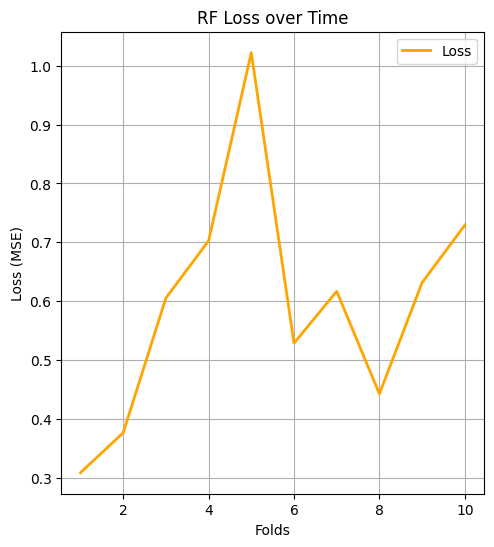

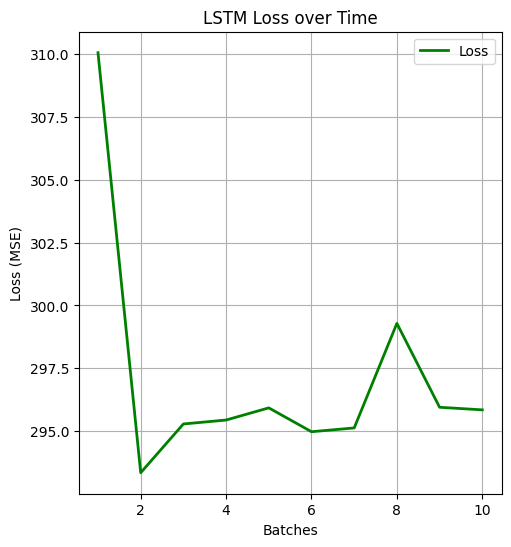

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(folds_or_batches, RF_mse_scores, color='orange', label='Loss', linewidth=2)
plt.title('RF Loss over Time')
plt.xlabel('Folds')
plt.ylabel('Loss (MSE)')
plt.grid()
plt.legend()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(folds_or_batches, LSTM_mse_scores, color='green', label='Loss', linewidth=2)
plt.title('LSTM Loss over Time')
plt.xlabel('Batches')
plt.ylabel('Loss (MSE)')
plt.grid()
plt.legend()

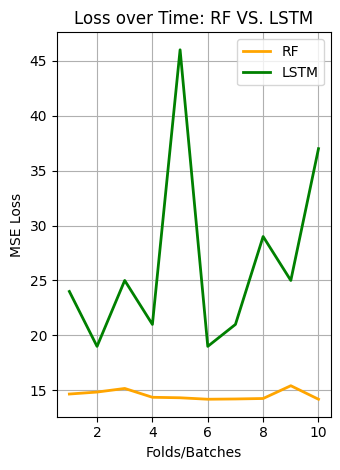

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(folds_or_batches, RF_times, color='orange', label='RF', linewidth=2)
plt.plot(folds_or_batches, LSTM_times, color='green', label='LSTM', linewidth=2)
plt.title('Time per iteration: RF VS. LSTM')
plt.xlabel('Folds/Batches')
plt.ylabel('time(s)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

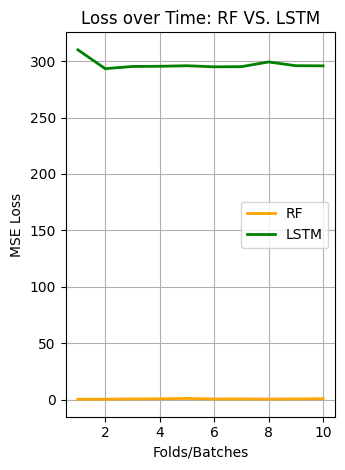

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(folds_or_batches, RF_mse_scores, color='orange', label='RF', linewidth=2)
plt.plot(folds_or_batches, LSTM_mse_scores, color='green', label='LSTM', linewidth=2)
plt.title('Loss over Time: RF VS. LSTM')
plt.xlabel('Folds/Batches')
plt.ylabel('MSE Loss')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()